# Clustering Analysis
*Taiwan Credit Dataset*

*Ben Perkins*

*August 2022*

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/Github/ml-blog

/content/gdrive/MyDrive/Github/ml-blog


In [ ]:
!pip install matplotlib==3.5.3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

* Using the data after preprocessing. 
* These steps include:
    * **one-hot encoding** all categorical features;
    * using `sklearn.preprocessing.StandardScaler` to scale all numeric features.
    * Drop the original features from the dataset.

In [10]:
filename = 'taiwan-credit-col-transform-FULL.csv'

In [12]:
DATA = os.path.relpath('/content/gdrive/MyDrive/Github/ml-blog/credit/data/' + filename)

In [14]:
df_procd = pd.read_csv(DATA, index_col=[0], header=[0])

In [15]:
df_procd.head()

,category__SEX_1,category__SEX_2,category__EDUCATION_0,category__EDUCATION_1,category__EDUCATION_2,category__EDUCATION_3,category__EDUCATION_4,category__EDUCATION_5,category__EDUCATION_6,category__MARRIAGE_0,...,nums__BILL_AMT4,nums__BILL_AMT5,nums__BILL_AMT6,nums__PAY_AMT1,nums__PAY_AMT2,nums__PAY_AMT3,nums__PAY_AMT4,nums__PAY_AMT5,nums__PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [24]:
df_procd.columns

Index(['category__SEX_1', 'category__SEX_2', 'category__EDUCATION_0',
       'category__EDUCATION_1', 'category__EDUCATION_2',
       'category__EDUCATION_3', 'category__EDUCATION_4',
       'category__EDUCATION_5', 'category__EDUCATION_6',
       'category__MARRIAGE_0', 'category__MARRIAGE_1', 'category__MARRIAGE_2',
       'category__MARRIAGE_3', 'category__PAY_0_-2', 'category__PAY_0_-1',
       'category__PAY_0_0', 'category__PAY_0_1', 'category__PAY_0_2',
       'category__PAY_0_3', 'category__PAY_0_4', 'category__PAY_0_5',
       'category__PAY_0_6', 'category__PAY_0_7', 'category__PAY_0_8',
       'category__PAY_2_-2', 'category__PAY_2_-1', 'category__PAY_2_0',
       'category__PAY_2_1', 'category__PAY_2_2', 'category__PAY_2_3',
       'category__PAY_2_4', 'category__PAY_2_5', 'category__PAY_2_6',
       'category__PAY_2_7', 'category__PAY_2_8', 'category__PAY_3_-2',
       'category__PAY_3_-1', 'category__PAY_3_0', 'category__PAY_3_1',
       'category__PAY_3_2', 'category__PA

### PairGrid Plots of Numeric Features

* Note that the column names have a **double underscore** from either 'category__' or 'nums__'.

In [27]:
numerics = df_procd.loc[:, 'nums__LIMIT_BAL':'nums__PAY_AMT6']

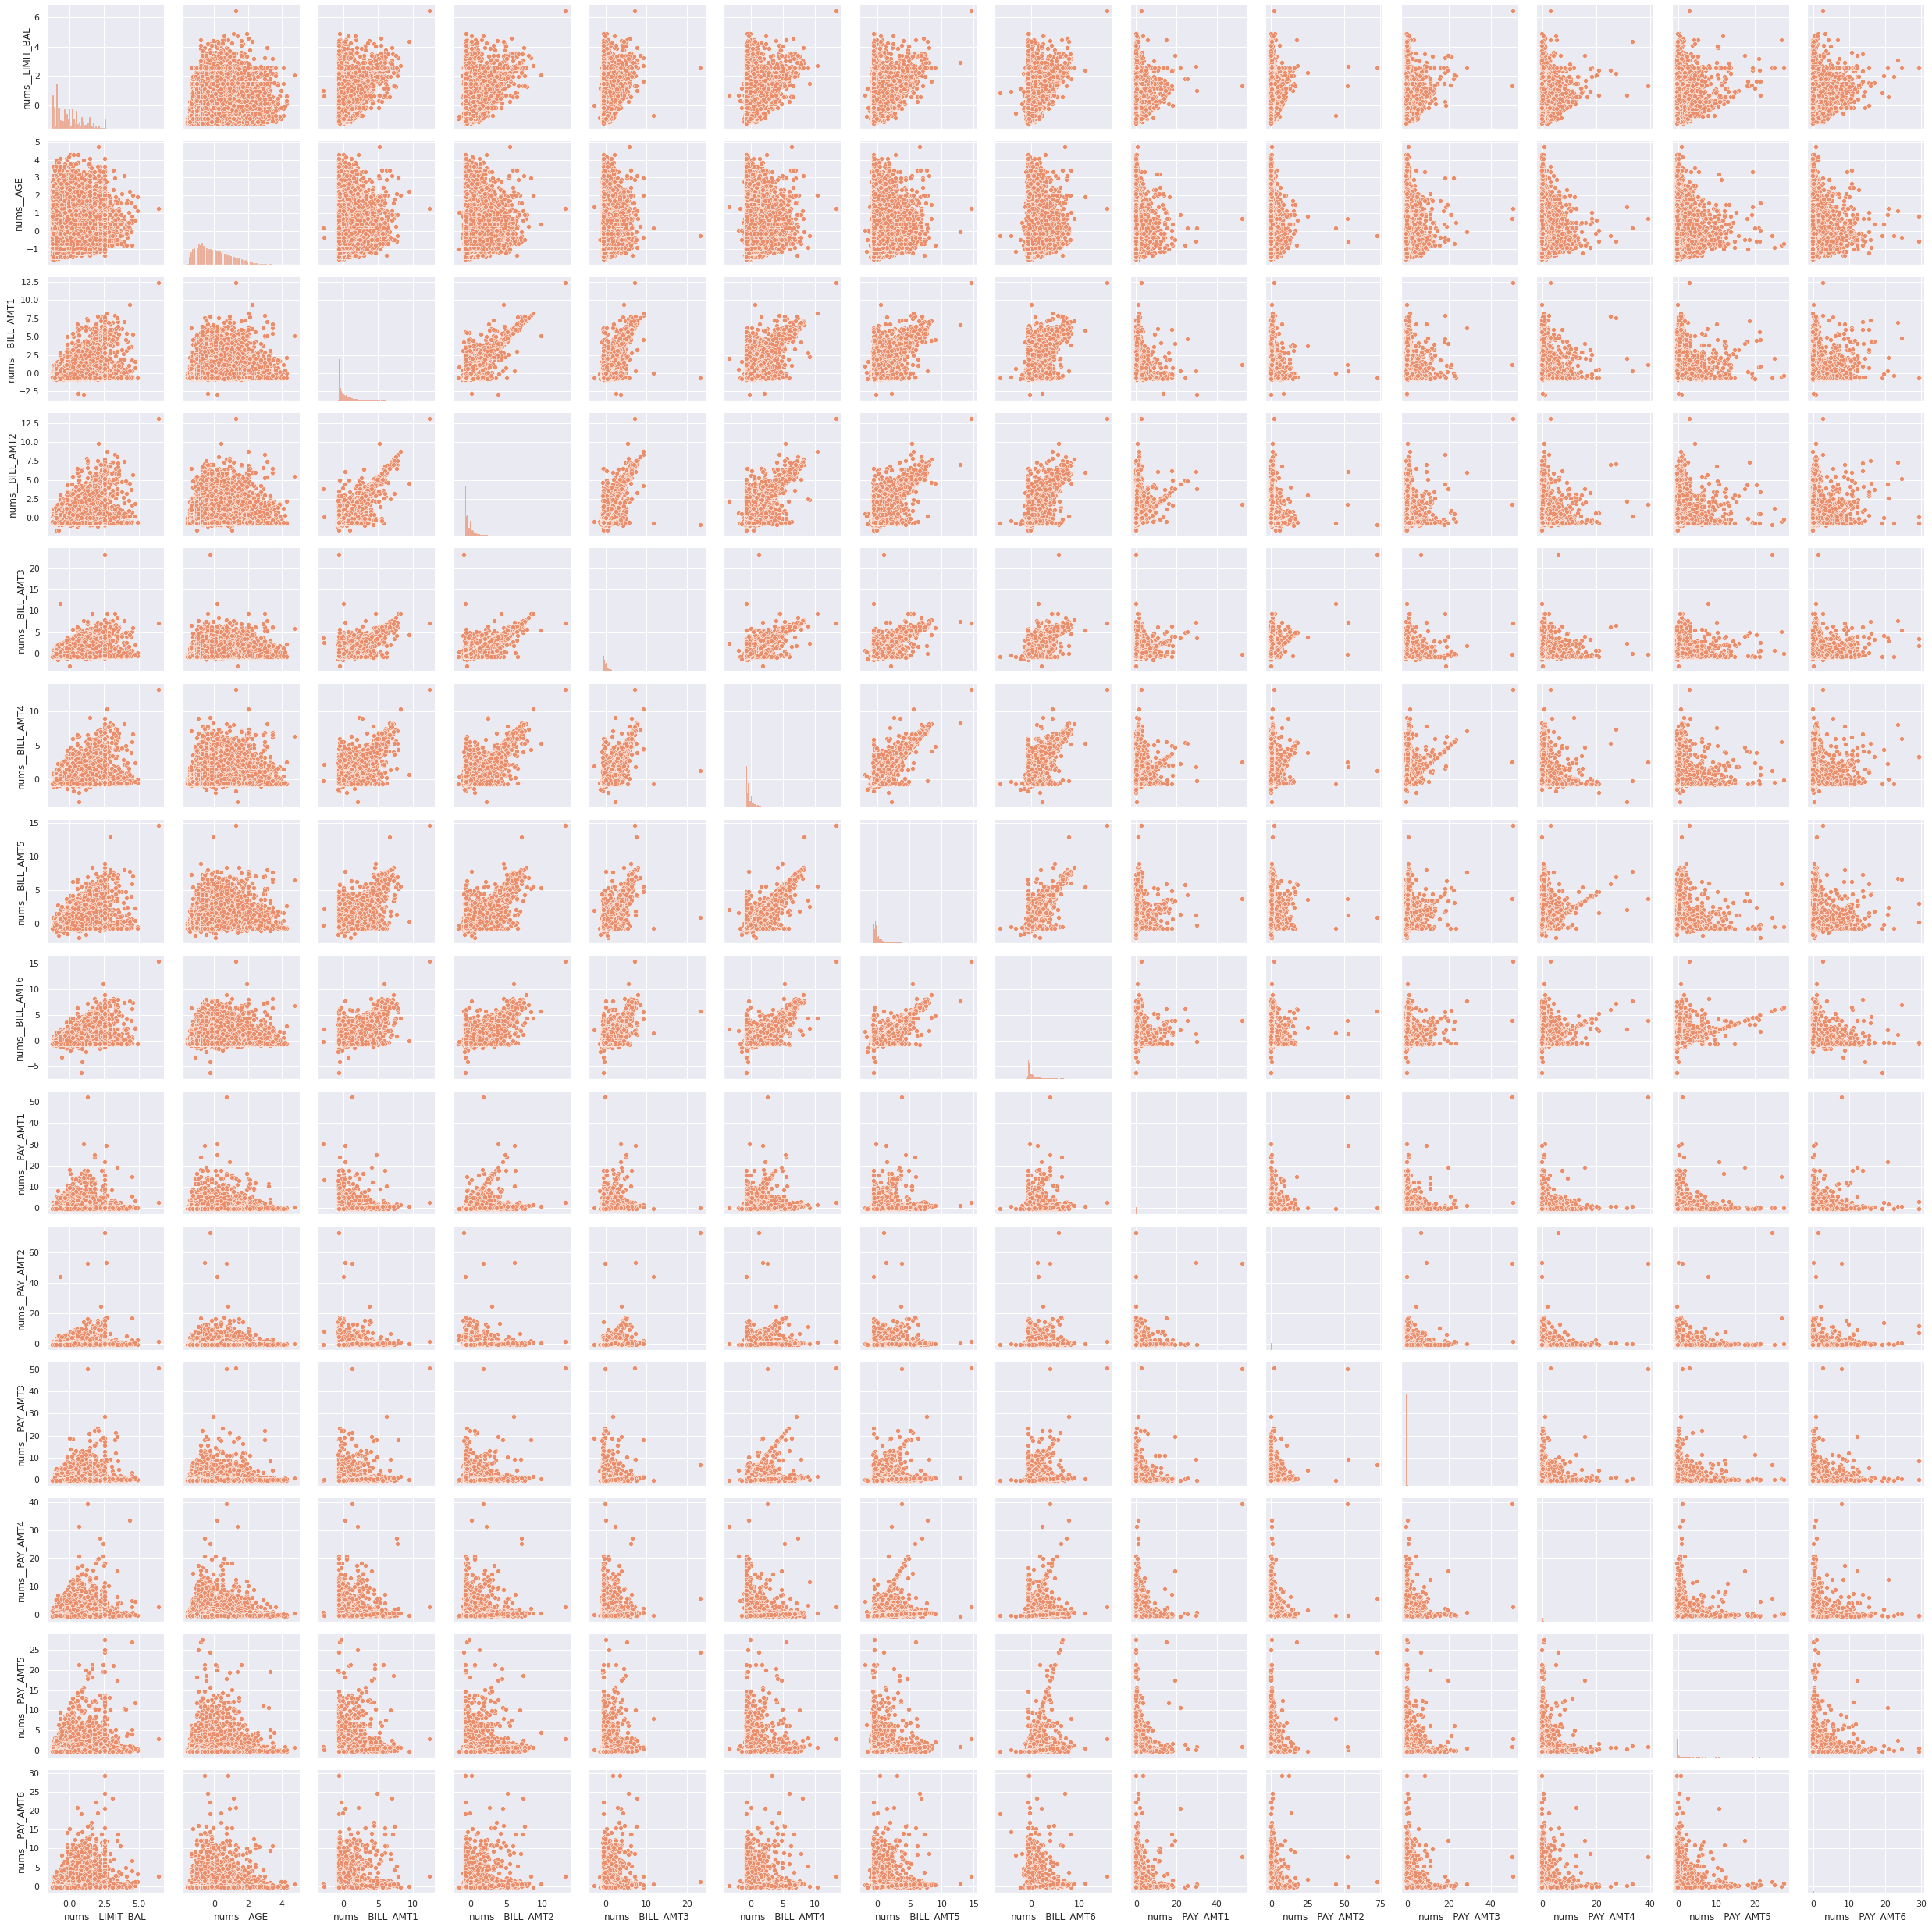

In [28]:
sns.set_theme(style='darkgrid', palette='flare')
g = sns.PairGrid(numerics)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [78]:
def qqplot(sample):
    z_samp = (sample - np.mean(sample)) / np.std(sample)
    fig, ax = plt.subplots(figsize=(6, 6))
    stats.probplot(z_samp, plot=ax)
    plt.title('QQ-Plot - ' + sample.name)

In [79]:
from scipy import stats
plt.style.use('ggplot')

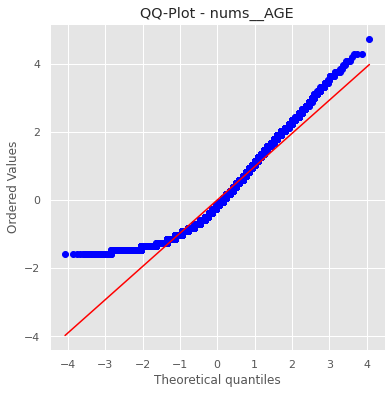

In [80]:
qqplot(numerics['nums__AGE'])

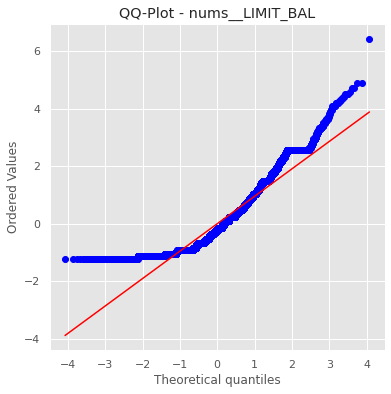

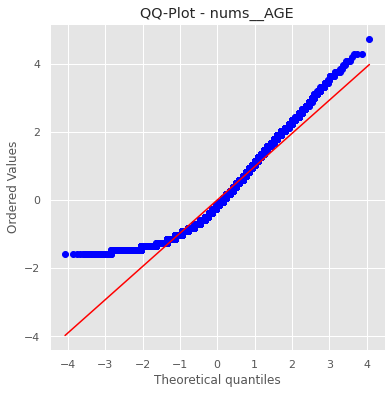

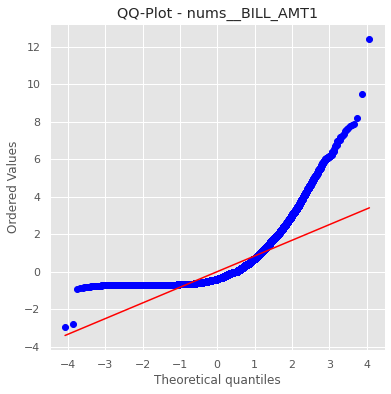

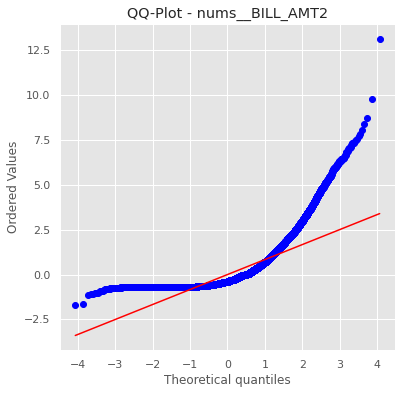

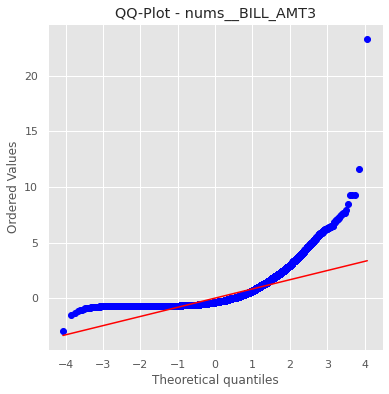

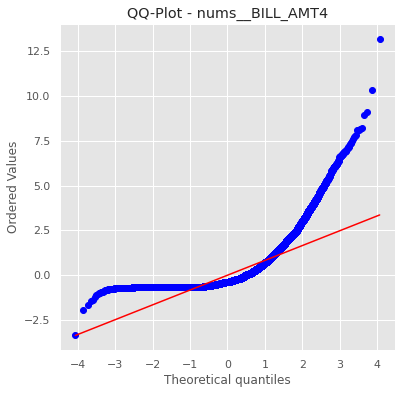

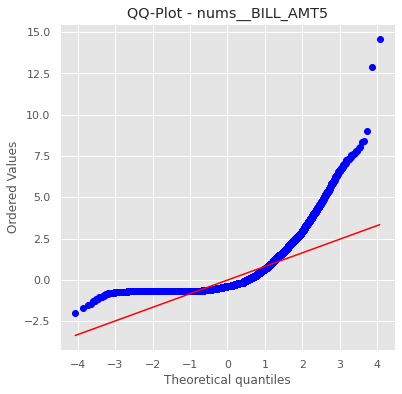

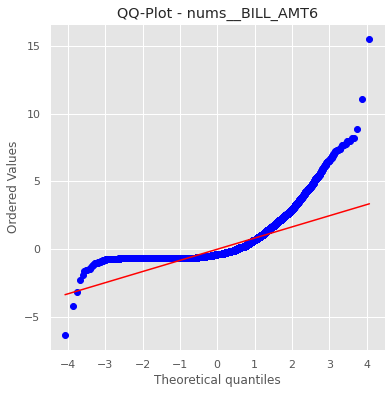

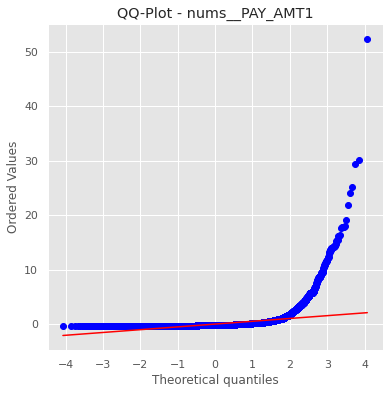

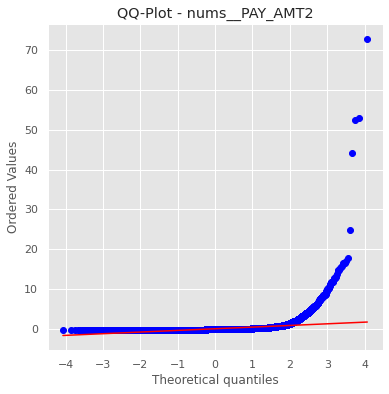

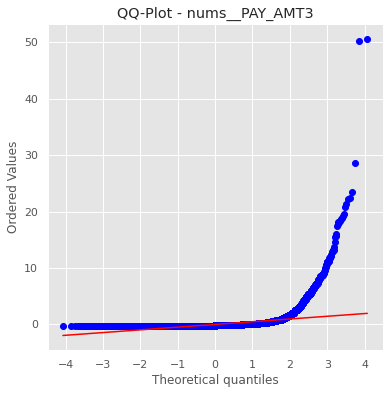

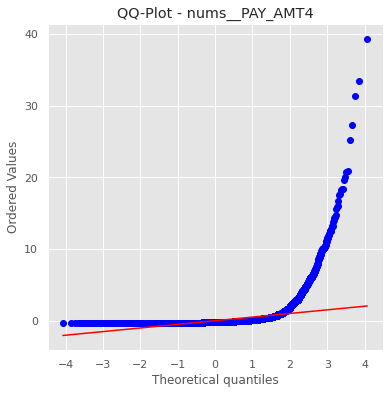

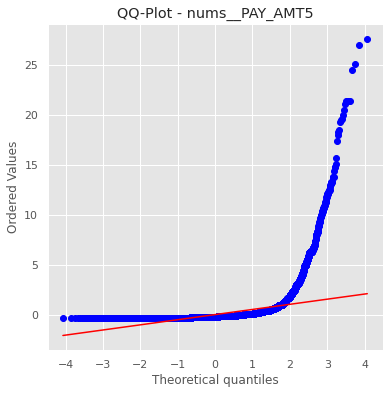

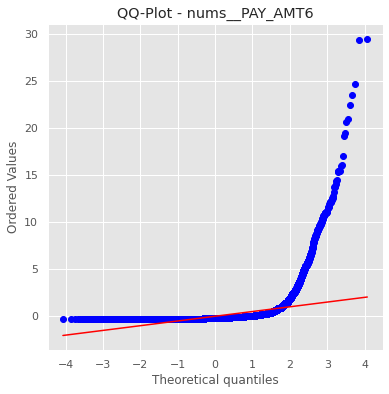

In [81]:
for j in numerics.columns:
    qqplot(numerics[j])

* We can safely conclude that none of the **numeric** features follow a **Normal Distribution**.
* These are mostly **long-tailed** features, skewed right.

## Cluster Analysis

In [93]:
X = df_procd.iloc[:, 0:91]
y = df_procd.iloc[:, 91]

In [94]:
X.columns, y.name

(Index(['category__SEX_1', 'category__SEX_2', 'category__EDUCATION_0',
        'category__EDUCATION_1', 'category__EDUCATION_2',
        'category__EDUCATION_3', 'category__EDUCATION_4',
        'category__EDUCATION_5', 'category__EDUCATION_6',
        'category__MARRIAGE_0', 'category__MARRIAGE_1', 'category__MARRIAGE_2',
        'category__MARRIAGE_3', 'category__PAY_0_-2', 'category__PAY_0_-1',
        'category__PAY_0_0', 'category__PAY_0_1', 'category__PAY_0_2',
        'category__PAY_0_3', 'category__PAY_0_4', 'category__PAY_0_5',
        'category__PAY_0_6', 'category__PAY_0_7', 'category__PAY_0_8',
        'category__PAY_2_-2', 'category__PAY_2_-1', 'category__PAY_2_0',
        'category__PAY_2_1', 'category__PAY_2_2', 'category__PAY_2_3',
        'category__PAY_2_4', 'category__PAY_2_5', 'category__PAY_2_6',
        'category__PAY_2_7', 'category__PAY_2_8', 'category__PAY_3_-2',
        'category__PAY_3_-1', 'category__PAY_3_0', 'category__PAY_3_1',
        'category__PAY_3_2'

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.cluster import KMeans

In [106]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, max_iter=200, random_state=42).fit(X_train)

In [107]:
centroids = kmeans.cluster_centers_

In [108]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_boundaries(kmeans, X_train)
plt.savefig('voronoi_exempts.png')
plt.show()

In [113]:
from sklearn.manifold import TSNE
import plotly.express as px

X_embed_train = TSNE(n_components=3, learning_rate='auto',
                     init='random', perplexity=5, random_state=42).fit_transform(X_train)

fig = px.scatter(
    X_embed_train, x=0, y=1
)

fig.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-113-83b77bd849d4>", line 5, in <module>
    init='random', perplexity=5, random_state=42).fit_transform(X_train)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py", line 1108, in fit_transform
    embedding = self._fit(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py", line 1010, in _fit
    skip_num_points=skip_num_points,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py", line 1056, in _tsne
    params, kl_divergence, it = _gradient_descent(obj_func, params, **opt_args)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py", line 398, in _gradient_descent
    error, grad = objective(p, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py"

KeyboardInterrupt: ignored